# Seattle AirBnB Data Analysis

A notebook that contains an analysis of AirBnB Data for Seattle for 2016, following the CRISP-DM process as part of the Data Science Nanodegree with Udacity.

In [2]:
# Import libraries for analysis
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

## 1) Business Understanding

what are the questions you are interested in tackling.   

   a) What is the monthly average price/night for the city?   
   b) What is the average price Monday to Sunday?   
   c) What is the monthly occupancy ratio for the city?   
   d) What is the average price/night per neighbourhood?   
   e) What is the occupancy ratio per neighbourhood?    


What are we asking - is the price set correctly to maximize return?


## 2) Data Understanding

Gather and analyze the data available. 

### Data Gathering

In [4]:
# Read in datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### Data Assessment

In [5]:
# Look at each dataset to get a feel of the data
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.sample(10)

,listing_id,date,available,price
1047751,7614244,2016-07-23,f,NaN
903181,4892529,2016-06-23,t,$245.00
52122,4550099,2016-10-22,f,NaN
216572,1905473,2016-05-10,t,$75.00
1101615,9563749,2016-02-18,f,NaN
883638,817115,2016-12-07,t,$50.00
377667,8107555,2016-09-17,f,NaN
1274277,8194164,2016-03-06,t,$60.00
1312088,7584142,2016-10-08,t,$100.00
1039895,9117301,2016-01-14,f,NaN


In [7]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
calendar.shape

(1393570, 4)

In [9]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [10]:
listings.sample(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2827,5479566,https://www.airbnb.com/rooms/5479566,20160104002432,2016-01-04,Simple Studio in Capitol Hill,Comfortable studio perfect for two. This 90-ye...,Advertised as a studio but I managed to put th...,Comfortable studio perfect for two. This 90-ye...,none,Very close to great restaurants and fun nightl...,NaN,Bus stops to get downtown and to the Universit...,NaN,NaN,https://a2.muscache.com/ac/pictures/29e3d372-2...,NaN,10397429,https://www.airbnb.com/users/show/10397429,Chris,2013-12-03,"Seattle, Washington",Bering Sea Fisherman that loves to travel,within a few hours,80%,100%,f,https://a1.muscache.com/ac/users/10397429/prof...,https://a1.muscache.com/ac/users/10397429/prof...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"East John St., Seattle, WA 98102, United States",NaN,Broadway,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.620703,-122.318864,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",NaN,$68.00,$600.00,"$2,400.00",$200.00,$25.00,1,$0.00,1,1125,2 months ago,t,25,55,85,360,2016-01-04,1,2015-11-22,2015-11-22,80.0,2.0,6.0,8.0,8.0,10.0,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.68
1554,2621746,https://www.airbnb.com/rooms/2621746,20160104002432,2016-01-04,Downtown 1 BR - Sky high apartment,"Feel the rhythm of Seattle in your 22nd story,...",This space is a pristine ultra modern apartmen...,"Feel the rhythm of Seattle in your 22nd story,...",none,"This apartment scores 98% on walk score, which...",Always feel free to ask me if you need anythin...,The apartment is a few block walk from the Wes...,https://a1.muscache.com/ac/pictures/34436659/4...,https://a1.muscache.com/im/pictures/34436659/4...,https://a1.muscache.com/ac/pictures/34436659/4...,https://a1.muscache.com/ac/pictures/34436659/4...,453540,https://www.airbnb.com/users/show/453540,Sid,2011-03-20,Seattle,We are really excited about hosting you during...,within a few hours,86%,100%,f,https://a1.muscache.com/ac/users/453540/profil...,https://a1.muscache.com/ac/users/453540/profil...,Belltown,5.0,5.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"Pine Street, Seattle, WA 98101, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.611863,-122.338782,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$99.00,"$1,300.00","$4,500.00",NaN,$35.00,2,$25.00,1,1125,5 days ago,t,22,52,79,323,2016-01-04,106,2014-03-30,2015-12-24,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,Na

In [11]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [73]:
listings.shape

(3818, 92)

In [12]:
# Verify the same number of listing ids
calendar.shape[0]/365

3818.0

In [13]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
57110,5241773,51426046,2015-10-20,28835145,Jill,"It was a little bit like coming home, or visit..."
35896,1686930,42202432,2015-08-11,19797313,Catherine,Paige was very informative during the entire p...
73487,3246706,20747006,2014-10-05,19856952,Beverly,"Lynette was flexible about our arrival time, a..."
54542,958475,17262218,2014-08-10,13048070,Sarah,The annex was a great place to stay. It was ve...
20031,823989,28351145,2015-03-22,13940837,Jimmy,Clean and quiet. Will stay there if visiting S...


In [15]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [16]:
reviews.shape

(84849, 6)

## 3) Prepare Data

Wrangle, clean, EDA and preprocess the data.

### Data Wrangling

In [17]:
# Missing values in any rows or columns
print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                              True
space                                True
description                         False
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                        True
host_about               

In [ ]:
# Check datatypes and convert

In [18]:
# Convert price into float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [19]:
# Convert Nan prices into 0 price
calendar['price'].fillna(0, inplace=True)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [20]:
# Convert column 'available' to a true boolean
calendar['available'] = calendar['available'] == 't'

In [21]:
calendar['available'].value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [19]:
#calendar['date'].value_counts()

In [22]:
calendar['date'].min()

'2016-01-04'

In [23]:
calendar['date'].max()

'2017-01-02'

In [24]:
# Convert column 'date' to a true datetype
calendar['date'] = pd.to_datetime(calendar['date'])

In [25]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

### Exploratory Data Analysis

In [26]:
df = calendar.groupby('listing_id')

In [29]:
# Total revenue for all rooms for the year
calendar['price'].sum()

128915264.0

In [28]:
# Total occupancy ratio for the year
round(calendar['available'].mean()*100,1)

67.1

In [34]:
# Average price per night for the year
df['price'].mean().mean()

92.50720380031136

In [35]:
# Total number of accomodation listings
calendar.shape[0]/365

3818.0

In [36]:
# Average revenue per listing for the year
avg_annual_revenue = round(calendar['price'].sum()/ (calendar.shape[0]/365),0)
avg_annual_revenue

33765.0

In [37]:
# Extract neighbourhood information from listings dataframe
list = listings[['id','neighbourhood_group_cleansed']]
list.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [38]:
# Accomodation listings split by neighbourhood
list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [39]:
# Rename neighbourhood column
list = list.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})
list.head()

,listing_id,neighbourhood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [40]:
# Merge calendar and list dataframes into new_df
new_df = pd.merge(calendar, list, on=['listing_id', 'listing_id'])

In [41]:
# Check data types are OK
new_df.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
neighbourhood            object
dtype: object

In [42]:
# Change neighbourhood to categorical variable 
new_df['neighbourhood'] = new_df['neighbourhood'].astype('category')

#new_df['date'] = pd.to_datetime(new_df['date'])

# Shorten 'other neighbourhoods' to 'other' for length in visualizations
new_df['neighbourhood'] = new_df['neighbourhood'].replace('Other neighborhoods','Other')

In [44]:
# Check changes
new_df[new_df['neighbourhood'] == 'Other'].head()

,listing_id,date,available,price,neighbourhood
102200,314180,2016-01-04,False,0.0,Other
102201,314180,2016-01-05,False,0.0,Other
102202,314180,2016-01-06,False,0.0,Other
102203,314180,2016-01-07,False,0.0,Other
102204,314180,2016-01-08,False,0.0,Other


In [45]:
# List of months and days of weeks for visualizations
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

### a) What is the monthly average price/night for the city?

In [46]:
# Monthly average price per night
avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
avg_price_per_night['date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night

,date,price
0,Jan,69.683499
1,Feb,82.308439
2,Mar,91.233047
3,Apr,89.683700
4,May,94.281823
5,Jun,99.453597
6,Jul,95.377854
7,Aug,97.181255
8,Sep,96.612092
9,Oct,95.444659


### b) What is the average price Monday to Sunday?

In [49]:
# Weekly average price per night
week = new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean()
week = pd.DataFrame(week).reset_index()
week['date'] = week['date'].replace(['0','1','2','3','4','5','6'], week_list)
week

,date,price
0,Mon,91.837727
1,Tue,91.052596
2,Wed,90.988420
3,Thu,90.992873
4,Fri,91.403801
5,Sat,95.678612
6,Sun,95.624370


In [53]:
# Average price for each week of 2016
weekly = round(new_df.groupby(new_df['date'].dt.strftime('%W'))['price'].mean(),2)
weekly = pd.DataFrame(weekly).reset_index()
weekly.columns=['week_number','price']
weekly['week_number'] = weekly['week_number'].astype(int)
weekly

,week_number,price
0,0,105.71
1,1,63.97
2,2,65.55
3,3,72.11
4,4,72.77
5,5,77.89
6,6,82.04
7,7,84.14
8,8,84.81
9,9,88.70


### c) What is the monthly occupancy ratio for the city?

In [47]:
# Monthly occupancy rates
occ_ratio_per_month = round(new_df.groupby(new_df['date'].dt.strftime('%m'))['available'].mean()*100,1)
occ_ratio_per_month = pd.DataFrame(occ_ratio_per_month).reset_index()
occ_ratio_per_month['date'] = occ_ratio_per_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
occ_ratio_per_month

,date,available
0,Jan,56.7
1,Feb,66.2
2,Mar,70.9
3,Apr,66.4
4,May,67.6
5,Jun,67.4
6,Jul,62.7
7,Aug,64.5
8,Sep,67.4
9,Oct,69.7


### d) What is the average price/night per neighbourhood?

In [59]:
# Average price per night by neighbourhood sorted top to bottom
new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Magnolia               153.922300
Downtown               121.756030
Queen Anne             109.267509
West Seattle           103.876024
Interbay               100.104857
Central Area            90.689617
Cascade                 88.749854
Ballard                 87.159333
Capitol Hill            86.331091
Other                   84.378410
University District     77.945767
Seward Park             75.556413
Lake City               72.665876
Beacon Hill             70.750964
Delridge                67.938998
Northgate               67.547226
Rainier Valley          67.122995
Name: price, dtype: float64

In [60]:
# Average price per night for each month alphabetically
hood_avg_price_per_month = round(new_df.groupby('neighbourhood')['price'].mean(),2)
hood_avg_price_per_month = pd.DataFrame(hood_avg_price_per_month).reset_index()
hood_avg_price_per_month

,neighbourhood,price
0,Ballard,87.16
1,Beacon Hill,70.75
2,Capitol Hill,86.33
3,Cascade,88.75
4,Central Area,90.69
5,Delridge,67.94
6,Downtown,121.76
7,Interbay,100.10
8,Lake City,72.67
9,Magnolia,153.92


### e) What is the occupancy ratio per neighbourhood?

In [62]:
# Monthly occupancy rates by neighbourhood
hood_occ = round(new_df.groupby('neighbourhood')['available'].mean()*100,1)
hood_occ = pd.DataFrame(hood_occ).reset_index()
hood_occ

,neighbourhood,available
0,Ballard,69.2
1,Beacon Hill,70.3
2,Capitol Hill,64.1
3,Cascade,57.6
4,Central Area,67.2
5,Delridge,74.7
6,Downtown,65.0
7,Interbay,84.5
8,Lake City,76.9
9,Magnolia,77.5


### Further investigation to be continued not used in blog post

In [296]:
# Price per night per month per neighbourhood
hood_price_month = round(new_df.groupby(['neighbourhood',new_df['date'].dt.strftime('%m')])['price'].mean(),2)
hood_price_month = pd.DataFrame(hood_price_month).reset_index()
hood_price_month

,neighbourhood,date,price
0,Ballard,01,58.09
1,Ballard,02,67.52
2,Ballard,03,77.33
3,Ballard,04,80.89
4,Ballard,05,86.17
5,Ballard,06,98.79
6,Ballard,07,92.31
7,Ballard,08,97.39
8,Ballard,09,94.70
9,Ballard,10,94.08


## 4) Data Modeling

In [ ]:
### None so far 

## 5) Evaluate the Results

### Explanatory Visualizations

In [51]:
current_palette = sns.color_palette("muted")

### a) What is the monthly average price/night for the city?

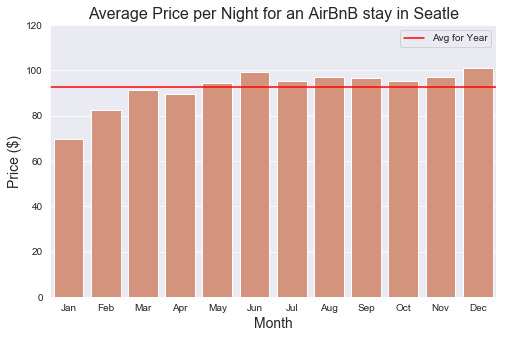

In [154]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="price",data=avg_price_per_night,color="coral", saturation=.5,)
plt.title("Average Price per Night for an AirBnB stay in Seatle",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Price ($)",fontsize=14)
plt.ylim(0,120)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.legend();


### b) What is the average price Monday to Sunday?

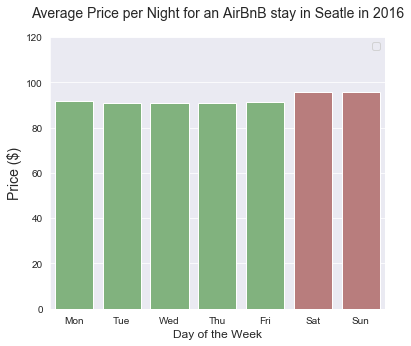

In [57]:
week["weekend"] = week["date"].isin(["Sat", "Sun"])

f, ax = plt.subplots(figsize=(6,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="price",hue='weekend',data=week,dodge=False,
            palette=current_palette[2:4],saturation=0.5)
plt.title("Average Price per Night for an AirBnB stay in Seatle in 2016",fontsize=14)
plt.xlabel("Day of the Week",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.ylim(0,120);

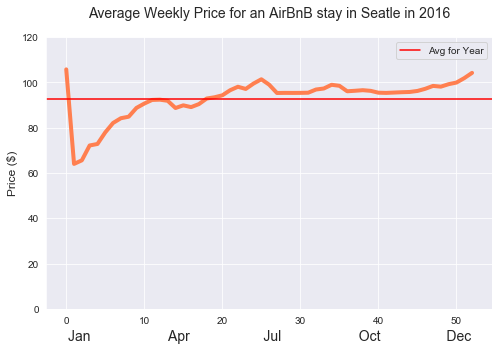

In [55]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.lineplot(x="week_number",y="price",data=weekly,color="coral",linewidth=4)
plt.title("Average Weekly Price for an AirBnB stay in Seatle in 2016",fontsize=14)
plt.xlabel("Jan                    Apr                   Jul                 "
           "   Oct                 Dec",fontsize=14)
plt.ylabel("Price ($)",fontsize=12)
plt.ylim(0,120)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.legend()
ttl = ax.title
ttl.set_position([.5, 1.05]);

### c) What is the monthly occupancy ratio for the city?

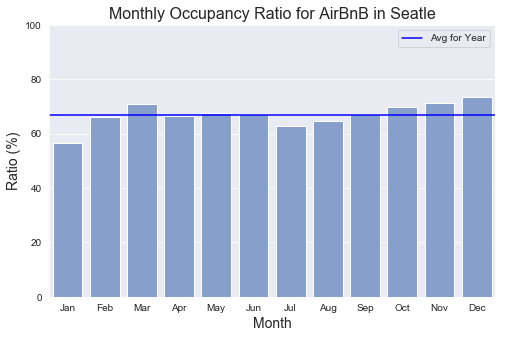

In [164]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="available",data=occ_ratio_per_month,color="cornflowerblue", saturation=.5,)
plt.title("Monthly Occupancy Ratio for AirBnB in Seatle",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Ratio (%)",fontsize=14)
plt.ylim(0,100)
plt.axhline(calendar['available'].mean()*100,color='b',label='Avg for Year')
ax.legend();

### d) What is the monthly average price/night per neighbourhood?

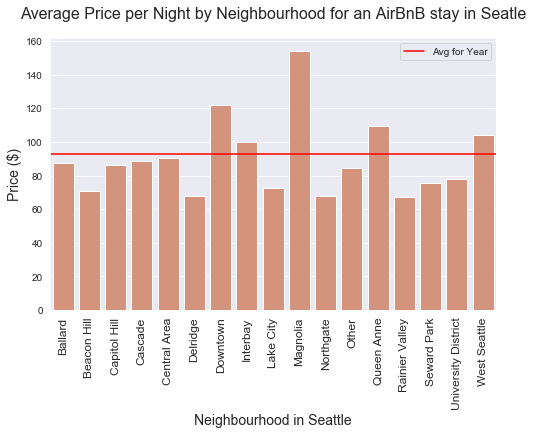

In [61]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="neighbourhood",y="price",data=hood_avg_price_per_month,color="coral", saturation=.5,)
plt.title("Average Price per Night by Neighbourhood for an AirBnB stay in Seatle",fontsize=16)
plt.xlabel("Neighbourhood in Seattle",fontsize=14)
plt.ylabel("Price ($)",fontsize=14)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
plt.legend()
ttl = ax.title
ttl.set_position([.5, 1.05]);

### e) What is the occupancy ratio per neighbourhood?

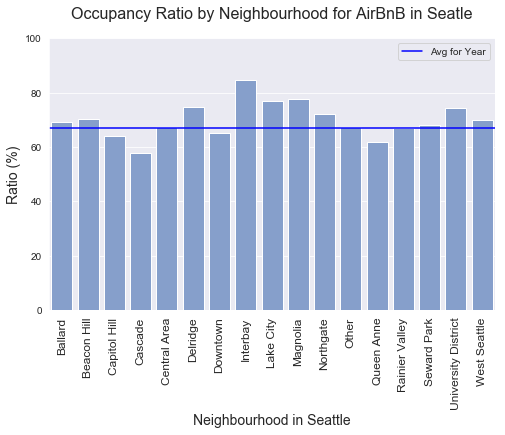

In [64]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="neighbourhood",y="available",data=hood_occ,color="cornflowerblue", saturation=.5,)
plt.title("Occupancy Ratio by Neighbourhood for AirBnB in Seatle",fontsize=16)
plt.xlabel("Neighbourhood in Seattle",fontsize=14)
plt.ylabel("Ratio (%)",fontsize=14)
plt.ylim(0,100)
plt.axhline(calendar['available'].mean()*100,color='b',label='Avg for Year')
ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
ax.legend()
ttl = ax.title
ttl.set_position([.5, 1.05]);

## 6) Deploy model or results

In [ ]:
### None so far 